C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\김보경\AppData\Local\conda\conda\envs\venv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


epoch:0, train acc:0.09666666666666666, test acc:0.0884
epoch:1, train acc:0.14333333333333334, test acc:0.1126
epoch:2, train acc:0.20333333333333334, test acc:0.1511
epoch:3, train acc:0.22666666666666666, test acc:0.1711
epoch:4, train acc:0.23666666666666666, test acc:0.1947
epoch:5, train acc:0.2633333333333333, test acc:0.221
epoch:6, train acc:0.2966666666666667, test acc:0.2437
epoch:7, train acc:0.33, test acc:0.2625
epoch:8, train acc:0.3433333333333333, test acc:0.2756
epoch:9, train acc:0.36, test acc:0.287
epoch:10, train acc:0.36666666666666664, test acc:0.2972
epoch:11, train acc:0.37333333333333335, test acc:0.3022
epoch:12, train acc:0.41333333333333333, test acc:0.3197
epoch:13, train acc:0.4266666666666667, test acc:0.3248
epoch:14, train acc:0.43333333333333335, test acc:0.3324
epoch:15, train acc:0.44333333333333336, test acc:0.3465
epoch:16, train acc:0.4266666666666667, test acc:0.3458
epoch:17, train acc:0.44666666666666666, test acc:0.3544
epoch:18, train acc:0

epoch:158, train acc:0.92, test acc:0.7528
epoch:159, train acc:0.9233333333333333, test acc:0.751
epoch:160, train acc:0.91, test acc:0.7497
epoch:161, train acc:0.9133333333333333, test acc:0.7489
epoch:162, train acc:0.9266666666666666, test acc:0.7476
epoch:163, train acc:0.9233333333333333, test acc:0.7505
epoch:164, train acc:0.9133333333333333, test acc:0.7493
epoch:165, train acc:0.91, test acc:0.7471
epoch:166, train acc:0.9133333333333333, test acc:0.754
epoch:167, train acc:0.9233333333333333, test acc:0.7599
epoch:168, train acc:0.92, test acc:0.7482
epoch:169, train acc:0.9133333333333333, test acc:0.7546
epoch:170, train acc:0.9166666666666666, test acc:0.7519
epoch:171, train acc:0.9133333333333333, test acc:0.7446
epoch:172, train acc:0.9133333333333333, test acc:0.7502
epoch:173, train acc:0.91, test acc:0.7461
epoch:174, train acc:0.9166666666666666, test acc:0.7528
epoch:175, train acc:0.9133333333333333, test acc:0.7459
epoch:176, train acc:0.9133333333333333, test 

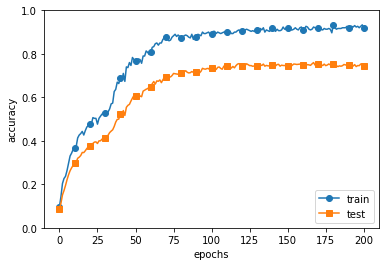

In [1]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 오버피팅을 일으키기 위해 훈련데이터의 크기를 작게 조정
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（가중치 감쇠） 설정 =======================
#weight_decay_lambda = 0 # weight decay를 사용하지 않을 경우
weight_decay_lambda = 0.1

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10, 
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size/batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch==0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

# 그래프 그리기==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()
